### Import Pandas  as  pd and load Data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df=pd.read_csv("pathau.csv")

In [50]:
df.head()

,call_id,queue_id,service_id,counter_id,user_id,token_letter,token_number,called_date,started_at,ended_at,waiting_time,served_time,turn_around_time,queue_number,service_name,counter_name,user_name
0,28,45,1,2,2,W,1,2024-01-25,2024-01-25 18:26:13,2024-01-25 18:34:14,00:06:45,00:08:01,00:14:46,1,WIS (W),Counter 2,Nandu Acharaya
1,29,46,1,2,2,W,2,2024-01-25,2024-01-25 18:34:16,2024-01-25 18:34:24,00:13:39,00:00:08,00:13:47,2,WIS (W),Counter 2,Nandu Acharaya
2,30,48,2,2,2,NR,1,2024-01-25,2024-01-25 18:34:53,NaN,00:00:13,NaN,NaN,1,NEW REGISTRATION (NR),Counter 2,Nandu Acharaya
3,31,47,1,2,2,W,3,2024-01-25,2024-01-25 18:35:14,2024-01-25 18:35:18,00:10:17,00:00:04,00:10:21,3,WIS (W),Counter 2,Nandu Acharaya
4,32,50,3,3,2,T,1,2024-01-25,2024-01-25 18:35:58,2024-01-25 18:37:00,00:00:29,00:01:02,00:01:31,1,TRAINING (T),Counter 3,Nandu Acharaya


# Data Cleaning

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3354 entries, 0 to 3353
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   call_id           3354 non-null   int64 
 1   queue_id          3354 non-null   int64 
 2   service_id        3354 non-null   int64 
 3   counter_id        3354 non-null   int64 
 4   user_id           3354 non-null   int64 
 5   token_letter      3354 non-null   object
 6   token_number      3354 non-null   int64 
 7   called_date       3354 non-null   object
 8   started_at        3354 non-null   object
 9   ended_at          3335 non-null   object
 10  waiting_time      3354 non-null   object
 11  served_time       2737 non-null   object
 12  turn_around_time  2737 non-null   object
 13  queue_number      3354 non-null   int64 
 14  service_name      3354 non-null   object
 15  counter_name      3354 non-null   object
 16  user_name         3354 non-null   object
dtypes: int64(7), o

In [52]:
# Check for missing values and data types
print("Missing values:")
print(df.isnull().sum())

Missing values:
call_id               0
queue_id              0
service_id            0
counter_id            0
user_id               0
token_letter          0
token_number          0
called_date           0
started_at            0
ended_at             19
waiting_time          0
served_time         617
turn_around_time    617
queue_number          0
service_name          0
counter_name          0
user_name             0
dtype: int64


### droping the start timestamp and end timestamp

In [53]:
df.drop(columns=['started_at'],inplace=True)
df.drop(columns=['ended_at'],inplace=True)
df.drop(columns=['service_id'],inplace=True)
df.drop(columns=['counter_id'],inplace=True)

In [54]:
print(df.isnull().sum())

call_id               0
queue_id              0
user_id               0
token_letter          0
token_number          0
called_date           0
waiting_time          0
served_time         617
turn_around_time    617
queue_number          0
service_name          0
counter_name          0
user_name             0
dtype: int64


## Handeling missing values 
#### Function to Convert time(hr:min:sec) into seconds

In [55]:
def time_to_seconds(time_str):
    if pd.isnull(time_str):
        return None
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s


#### Converting served_time, waiting_time and turn_aruound_time in seconds 

In [56]:
# Convert time columns to seconds
df['served_time_seconds'] = df['served_time'].apply(time_to_seconds)
df['turn_around_time_seconds'] = df['turn_around_time'].apply(time_to_seconds)
df['waiting_time_seconds']=df['waiting_time'].apply(time_to_seconds)


## Remove served_time and turn_around_time 

In [57]:
df.drop(columns=['served_time'],inplace=True)
df.drop(columns=['turn_around_time'],inplace=True)
df.drop(columns=['waiting_time'],inplace=True)


In [59]:
df.head()

,call_id,queue_id,user_id,token_letter,token_number,called_date,queue_number,service_name,counter_name,user_name,served_time_seconds,turn_around_time_seconds,waiting_time_seconds
0,28,45,2,W,1,2024-01-25,1,WIS (W),Counter 2,Nandu Acharaya,481.0,886.0,405
1,29,46,2,W,2,2024-01-25,2,WIS (W),Counter 2,Nandu Acharaya,8.0,827.0,819
2,30,48,2,NR,1,2024-01-25,1,NEW REGISTRATION (NR),Counter 2,Nandu Acharaya,NaN,NaN,13
3,31,47,2,W,3,2024-01-25,3,WIS (W),Counter 2,Nandu Acharaya,4.0,621.0,617
4,32,50,2,T,1,2024-01-25,1,TRAINING (T),Counter 3,Nandu Acharaya,62.0,91.0,29


In [61]:
df.isnull().sum()

call_id                       0
queue_id                      0
user_id                       0
token_letter                  0
token_number                  0
called_date                   0
queue_number                  0
service_name                  0
counter_name                  0
user_name                     0
served_time_seconds         617
turn_around_time_seconds    617
waiting_time_seconds          0
dtype: int64

#### immuting the missing values of served_time and turn_around_time with mean of their values

In [62]:
# Calculate mean values for imputation
mean_served_time = df['served_time_seconds'].mean()
mean_turn_around_time = df['turn_around_time_seconds'].mean()


# Impute missing values with mean
df.fillna({'served_time_seconds':mean_served_time}, inplace=True)
df.fillna({'turn_around_time_seconds':mean_turn_around_time}, inplace=True)



In [64]:
df

,call_id,queue_id,user_id,token_letter,token_number,called_date,queue_number,service_name,counter_name,user_name,served_time_seconds,turn_around_time_seconds,waiting_time_seconds
0,28,45,2,W,1,2024-01-25,1,WIS (W),Counter 2,Nandu Acharaya,481.000000,886.000000,405
1,29,46,2,W,2,2024-01-25,2,WIS (W),Counter 2,Nandu Acharaya,8.000000,827.000000,819
2,30,48,2,NR,1,2024-01-25,1,NEW REGISTRATION (NR),Counter 2,Nandu Acharaya,732.123128,4872.068688,13
3,31,47,2,W,3,2024-01-25,3,WIS (W),Counter 2,Nandu Acharaya,4.000000,621.000000,617
4,32,50,2,T,1,2024-01-25,1,TRAINING (T),Counter 3,Nandu Acharaya,62.000000,91.000000,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,4017,3414,11,NR,90,2024-02-16,90,NEW REGISTRATION (NR),Counter 7,Lokendra Sunar,1558.000000,4343.000000,2785
3350,4018,3415,12,NR,91,2024-02-16,91,NEW REGISTRATION (NR),Counter 4,Jyoti BK,758.000000,3169.000000,2411
3351,4019,3416,7,NR,92,2024-02-16,92,NEW REGISTRATION (NR),Counter 8,Prem Jaishi,732.123128,4872.068688,1736
3352,4020,3417,4,NR,93,2024-02-16,93,NEW REGISTRATION (NR),Counter 9,Ajaya Limbu,732.123128,4872.068688,483


## cHecking missing values 

In [65]:
print(df.isnull().sum())

call_id                     0
queue_id                    0
user_id                     0
token_letter                0
token_number                0
called_date                 0
queue_number                0
service_name                0
counter_name                0
user_name                   0
served_time_seconds         0
turn_around_time_seconds    0
waiting_time_seconds        0
dtype: int64


### Handle Outliers 
#### Detect and handle outliers of waiting_time, served_time, and turn_around_time

In [66]:
columns=['served_time_seconds','turn_around_time_seconds','waiting_time_seconds']

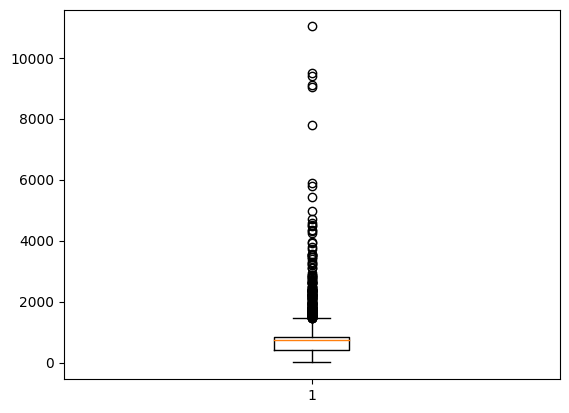

Total Outlier rows 184
mean value 629.3457317586203
Outliers rows after immute 0


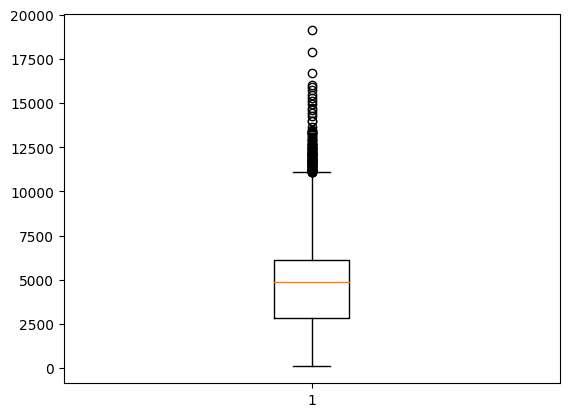

Total Outlier rows 109
mean value 4614.617066474208
Outliers rows after immute 0


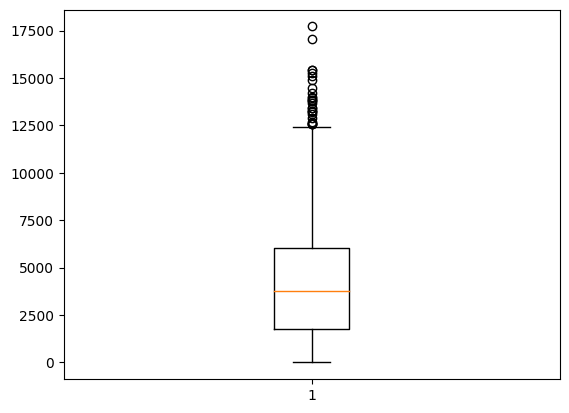

Total Outlier rows 27
mean value 4128.746618575293
Outliers rows after immute 0


In [67]:
# Box plot
for features in columns:
    plt.boxplot(df[features])
    plt.show()
    # Calculate IQR
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers
    outliers = df[(df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))]
    print("Total Outlier rows",len(outliers))
    mean_value = df[~df.index.isin(outliers.index)][features].mean()
    
    print("mean value",mean_value)
    df.loc[df.index.isin(outliers.index), features] = mean_value
    outliers_after_immute = df[(df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))]
    print("Outliers rows after immute",len(outliers_after_immute))

#### Descriptive Statistics

In [68]:
data=df['served_time_seconds'].describe()
print("Descriptive Statistic of Served time in seconds:\n")
print('Mean value :',data.iloc[1])
print('Median :',data.iloc[5])
print('Standard Deviation :',data.iloc[2])
print('First Quartile:',data.iloc[4])
print('Third quartile:',data.iloc[6])
print('Minimum value : ',data.iloc[3])
print('Maximum value : ',data.iloc[7])



Descriptive Statistic of Served time in seconds:

Mean value : 629.3457317586203
Median : 698.0
Standard Deviation : 301.9465105885816
First Quartile: 413.25
Third quartile: 768.0
Minimum value :  1.0
Maximum value :  1462.0


In [69]:
data=df['turn_around_time_seconds'].describe()
print("Descriptive Statistic of Turn around time in seconds:\n")
print('Mean value :',data.iloc[1])
print('Median :',data.iloc[5])
print('Standard Deviation :',data.iloc[2])
print('First Quartile:',data.iloc[4])
print('Third quartile:',data.iloc[6])
print('Minimum value : ',data.iloc[3])
print('Maximum value : ',data.iloc[7])

Descriptive Statistic of Turn around time in seconds:

Mean value : 4614.6170664742085
Median : 4872.068688344903
Standard Deviation : 2372.1517069474867
First Quartile: 2813.25
Third quartile: 5752.0
Minimum value :  91.0
Maximum value :  11081.0


In [70]:
data=df['waiting_time_seconds'].describe()
print("Descriptive Statistic of Waiting time in seconds:\n")
print('Mean value :',data.iloc[1])
print('Median :',data.iloc[5])
print('Standard Deviation :',data.iloc[2])
print('First Quartile:',data.iloc[4])
print('Third quartile:',data.iloc[6])
print('Minimum value : ',data.iloc[3])
print('Maximum value : ',data.iloc[7])

Descriptive Statistic of Waiting time in seconds:

Mean value : 4128.746618575293
Median : 3762.5
Standard Deviation : 2819.736972999102
First Quartile: 1771.25
Third quartile: 5942.0
Minimum value :  0.0
Maximum value :  12415.0


In [71]:
df.nunique()

call_id                     3354
queue_id                    3353
user_id                       13
token_letter                   3
token_number                 119
called_date                   20
queue_number                 119
service_name                   3
counter_name                  10
user_name                     13
served_time_seconds         1100
turn_around_time_seconds    2294
waiting_time_seconds        2768
dtype: int64

#### Visualizations 

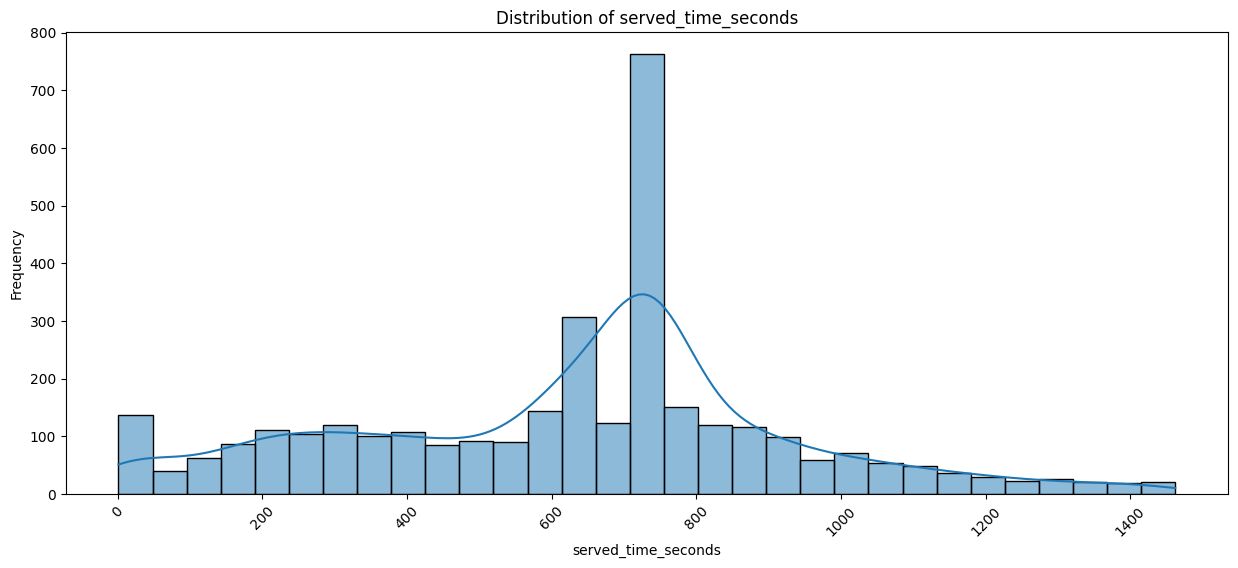

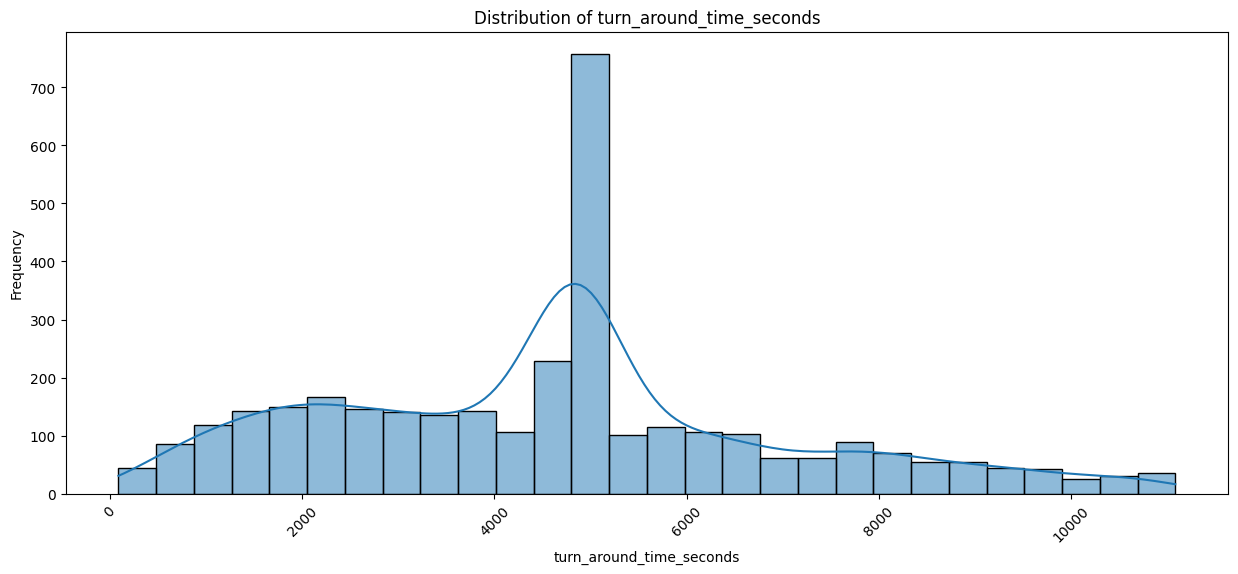

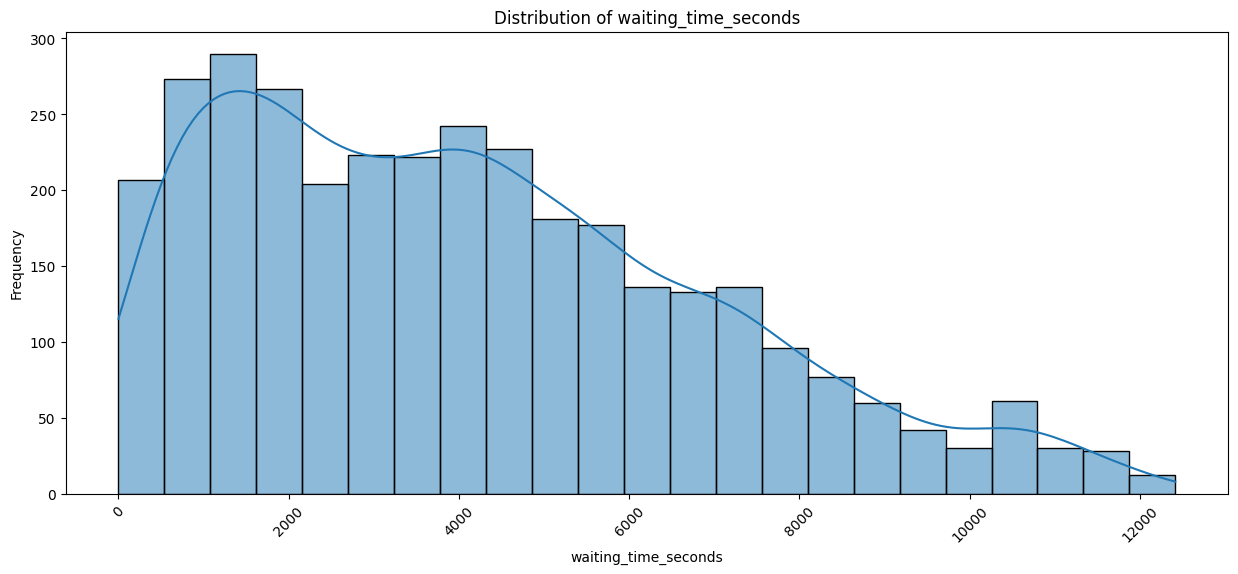

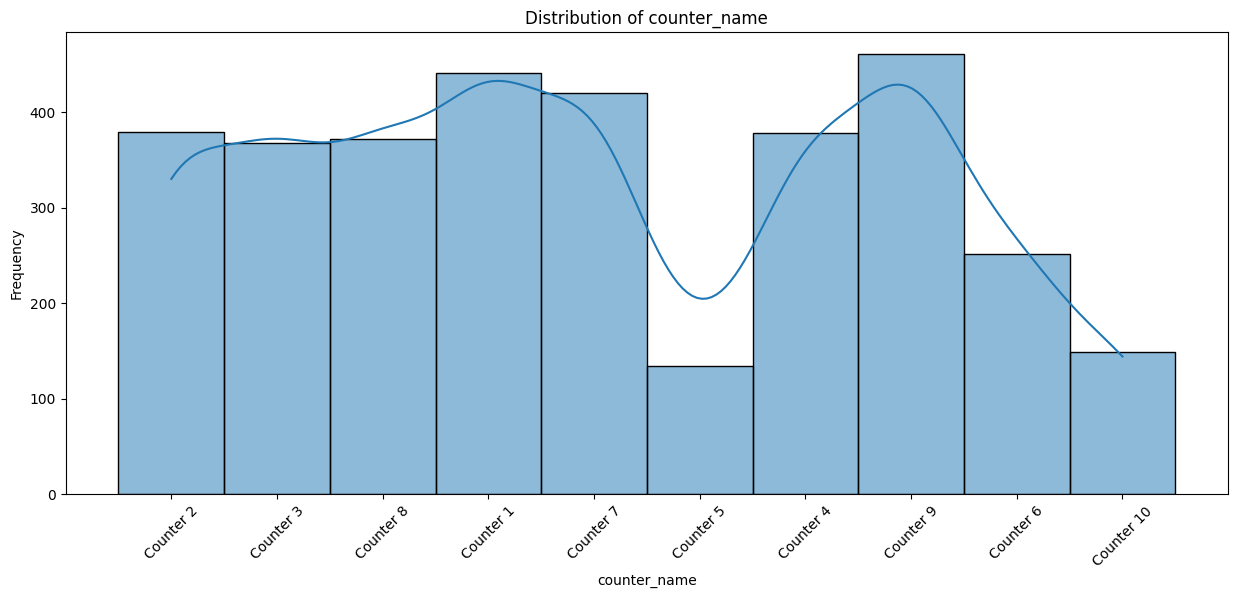

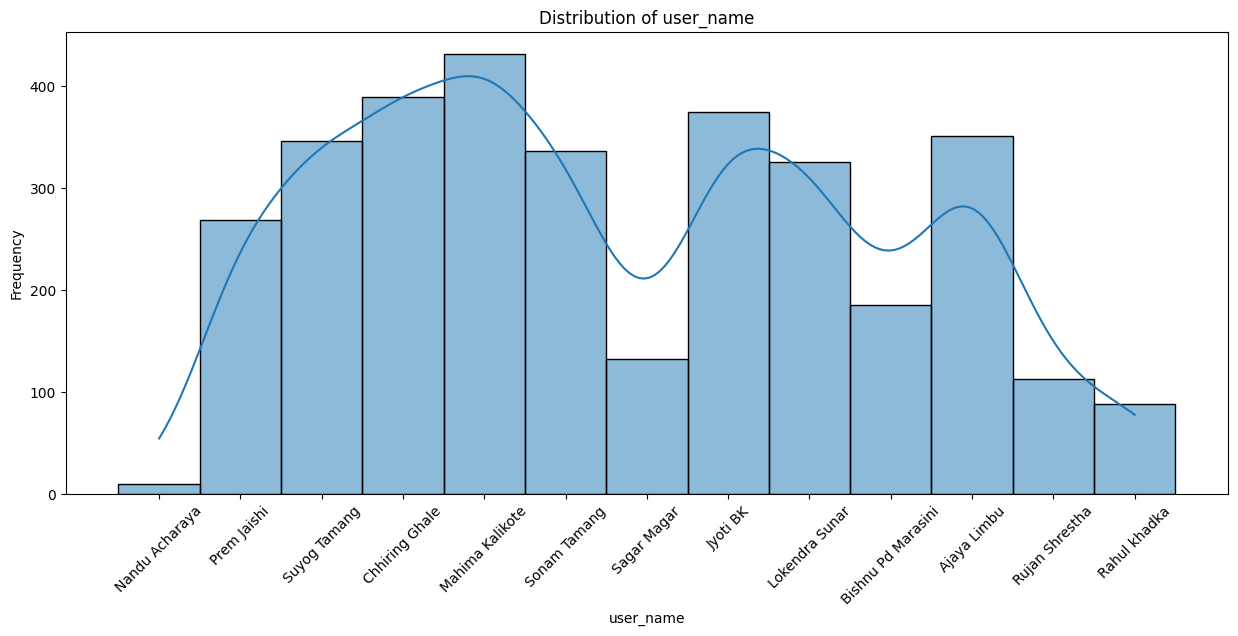

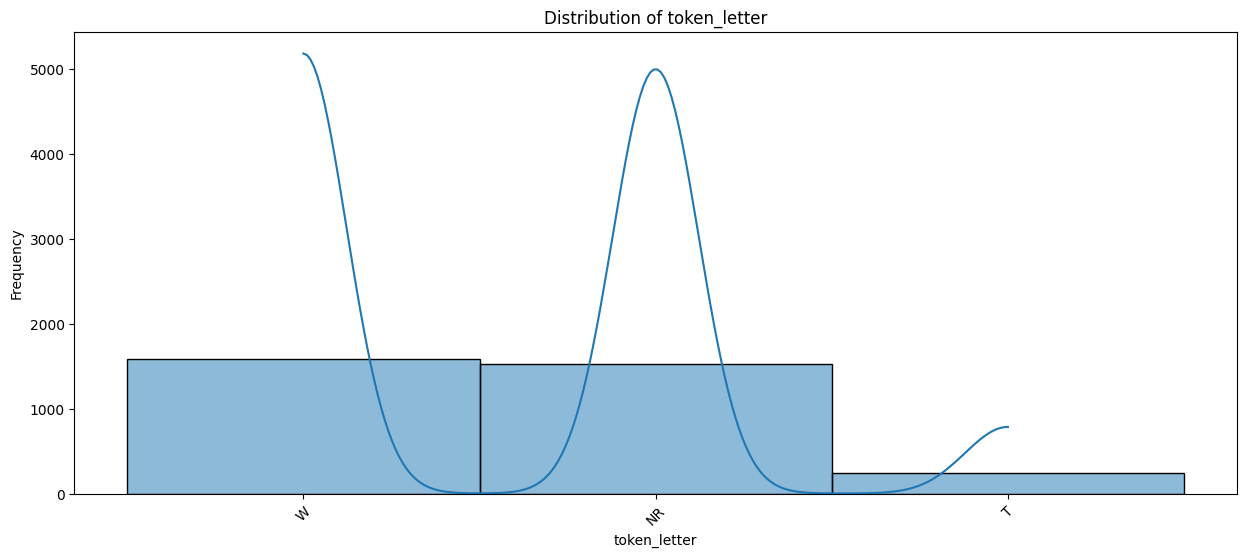

In [72]:

# Replace 'metric1', 'metric2' with actual column names
key_metrics = ['served_time_seconds','turn_around_time_seconds', 'waiting_time_seconds','counter_name','user_name','token_letter']
for metric in key_metrics:
    plt.figure(figsize=(15, 6))
    sns.histplot(df[metric], kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()



In [73]:
df.head()

,call_id,queue_id,user_id,token_letter,token_number,called_date,queue_number,service_name,counter_name,user_name,served_time_seconds,turn_around_time_seconds,waiting_time_seconds
0,28,45,2,W,1,2024-01-25,1,WIS (W),Counter 2,Nandu Acharaya,481.000000,886.000000,405.0
1,29,46,2,W,2,2024-01-25,2,WIS (W),Counter 2,Nandu Acharaya,8.000000,827.000000,819.0
2,30,48,2,NR,1,2024-01-25,1,NEW REGISTRATION (NR),Counter 2,Nandu Acharaya,732.123128,4872.068688,13.0
3,31,47,2,W,3,2024-01-25,3,WIS (W),Counter 2,Nandu Acharaya,4.000000,621.000000,617.0
4,32,50,2,T,1,2024-01-25,1,TRAINING (T),Counter 3,Nandu Acharaya,62.000000,91.000000,29.0


In [74]:

key_metrics=['user_name','counter_name']
df_index=df.copy()

df_index.set_index('called_date', inplace=True)


In [75]:

key_metrics=['user_name','counter_name']
df_index=df.copy()

df_index.set_index('called_date', inplace=True)


In [76]:
df_index.head()

,call_id,queue_id,user_id,token_letter,token_number,queue_number,service_name,counter_name,user_name,served_time_seconds,turn_around_time_seconds,waiting_time_seconds
called_date,,,,,,,,,,,,
2024-01-25,28,45,2,W,1,1,WIS (W),Counter 2,Nandu Acharaya,481.000000,886.000000,405.0
2024-01-25,29,46,2,W,2,2,WIS (W),Counter 2,Nandu Acharaya,8.000000,827.000000,819.0
2024-01-25,30,48,2,NR,1,1,NEW REGISTRATION (NR),Counter 2,Nandu Acharaya,732.123128,4872.068688,13.0
2024-01-25,31,47,2,W,3,3,WIS (W),Counter 2,Nandu Acharaya,4.000000,621.000000,617.0
2024-01-25,32,50,2,T,1,1,TRAINING (T),Counter 3,Nandu Acharaya,62.000000,91.000000,29.0


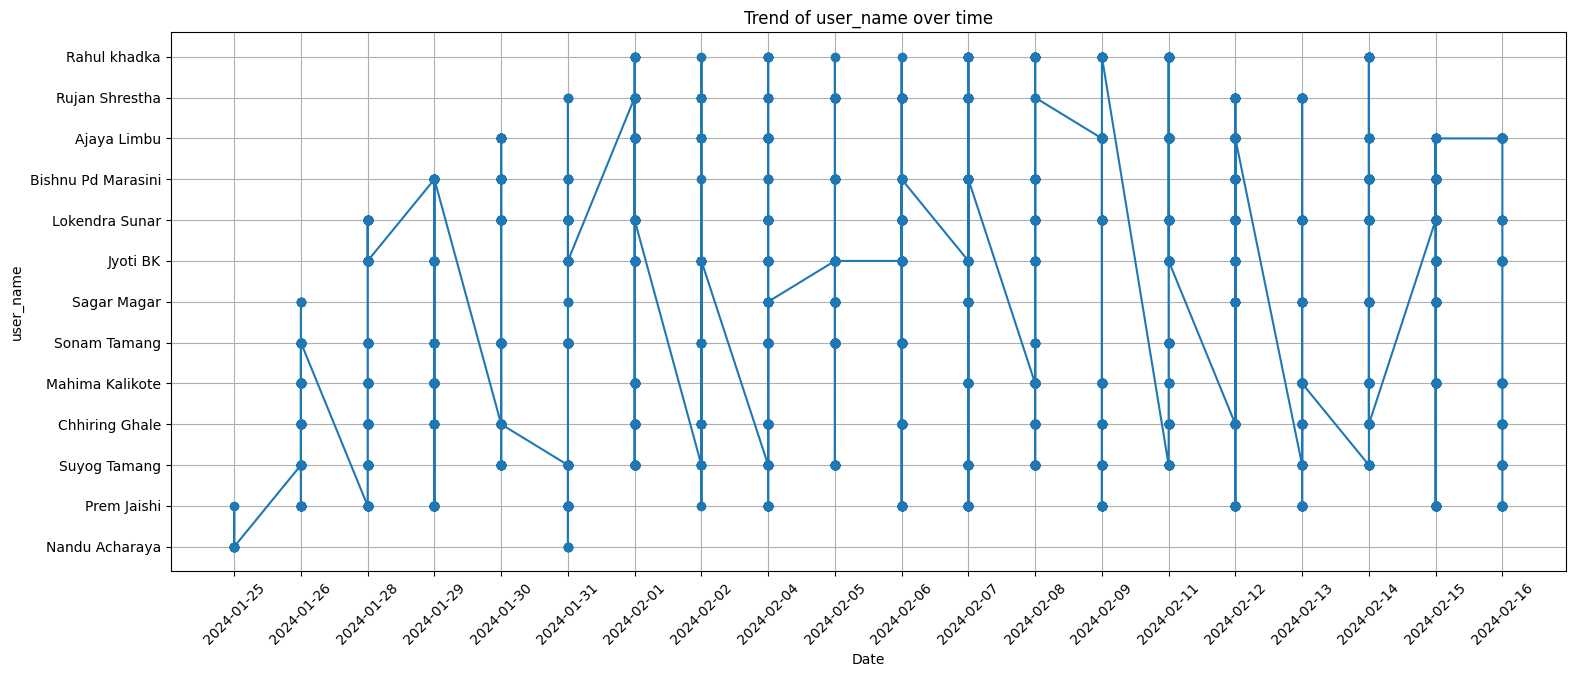

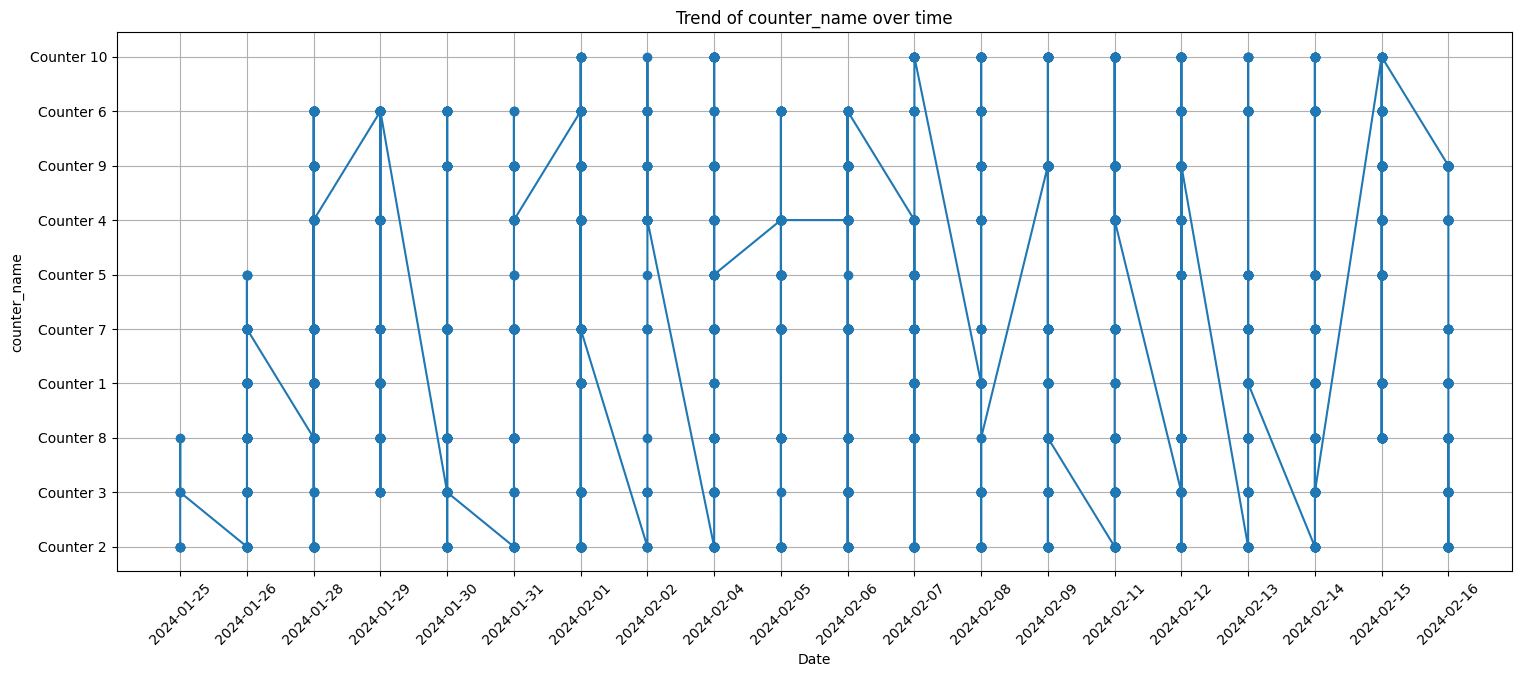

In [77]:
for metric in key_metrics:
    plt.figure(figsize=(18, 7))
    plt.plot(df_index.index, df_index[metric], marker='o')
    plt.title(f'Trend of {metric} over time')
    plt.xlabel('Date')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

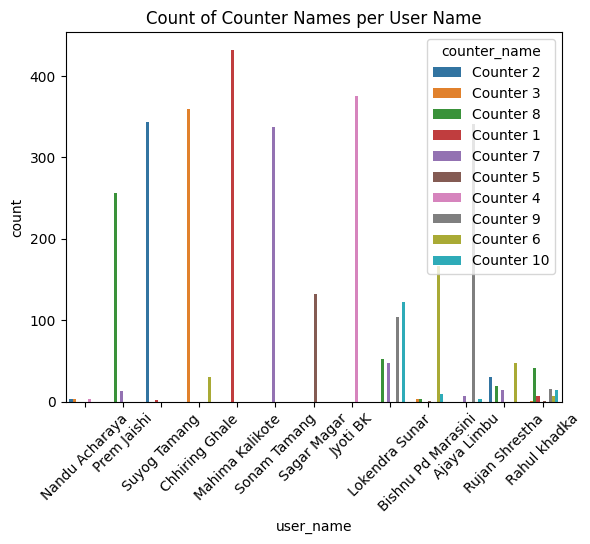

In [78]:
sns.countplot(x='user_name', hue='counter_name', data=df)
plt.xticks(rotation=45)
plt.title('Count of Counter Names per User Name')
plt.show()

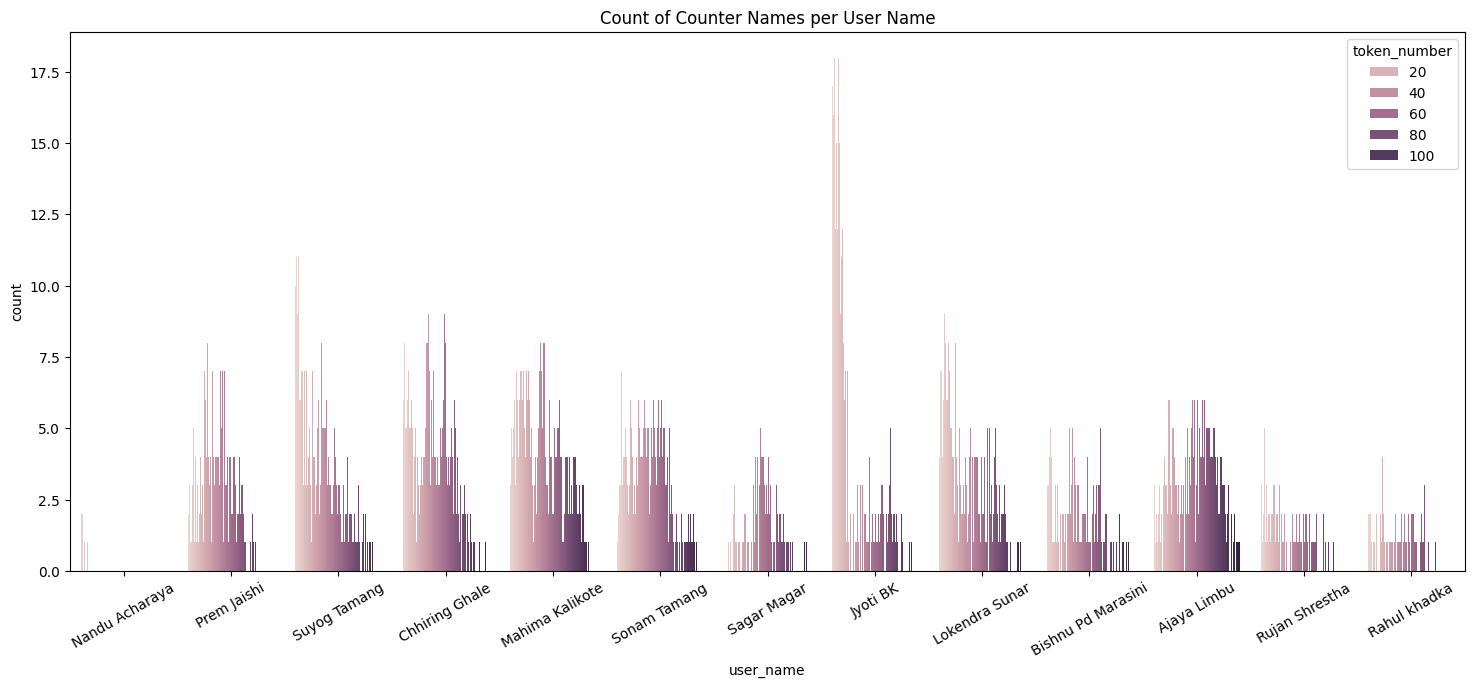

In [79]:
plt.figure(figsize=(18, 7))
sns.countplot(x='user_name', hue='token_number', data=df)
plt.xticks(rotation=30)
plt.title('Count of Counter Names per User Name')
plt.show()

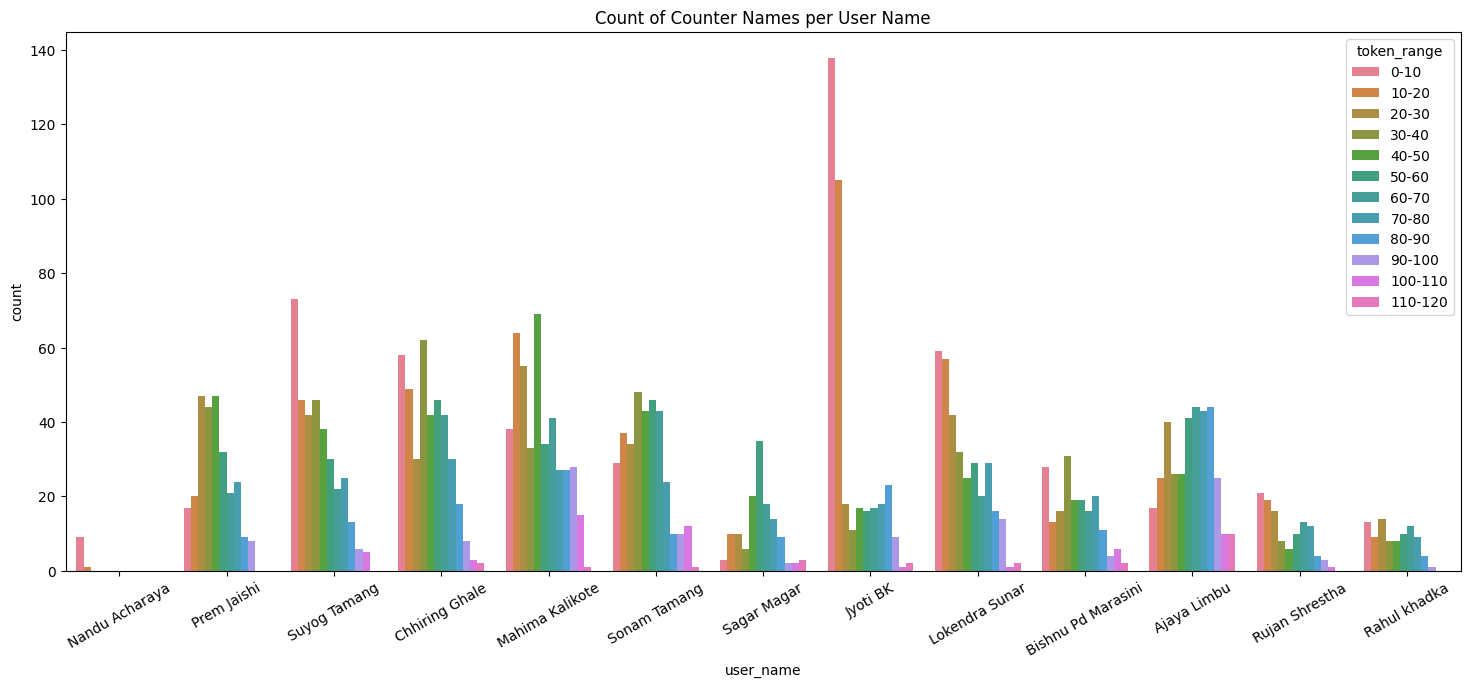

In [80]:
bins = list(range(0, 130, 10))

# Create bin labels
labels = [f'{i}-{i+10}' for i in range(0, 120, 10)]


labels[-1] = '110-120'
# Bin the token numbers into intervals
df['token_range'] = pd.cut(df['token_number'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(18, 7))
sns.countplot(x='user_name', hue='token_range', data=df)
plt.xticks(rotation=30)
plt.title('Count of Counter Names per User Name')
plt.show()



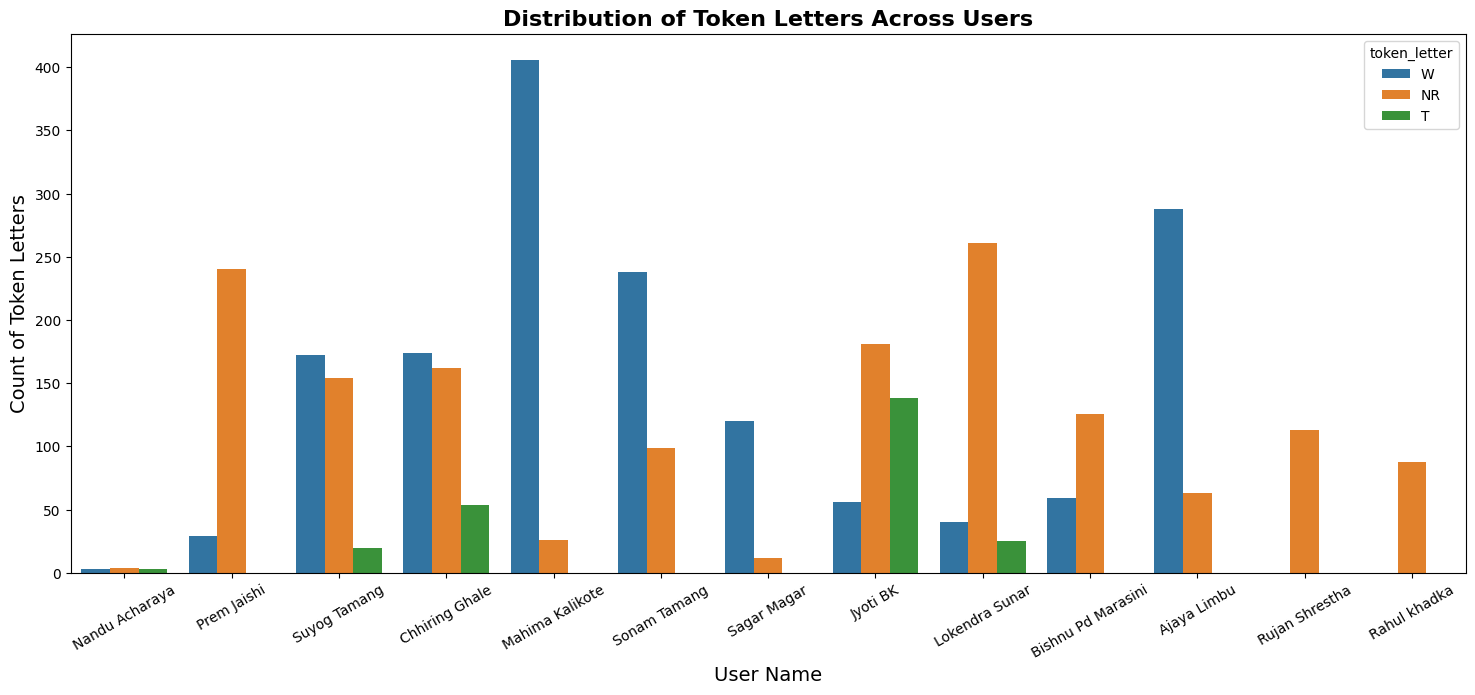

In [81]:

# Plot the graph
plt.figure(figsize=(18, 7))
sns.countplot(x='user_name', hue='token_letter', data=df)
plt.xticks(rotation=30)
plt.title('Distribution of Token Letters Across Users', fontsize=16, fontweight='bold')
plt.xlabel('User Name', fontsize=14)
plt.ylabel('Count of Token Letters', fontsize=14)
plt.show()

In [82]:
df_corr=df.drop(columns=['token_letter',"user_name","service_name","counter_name","token_range",'called_date'],axis=1)

In [83]:
df_corr

,call_id,queue_id,user_id,token_number,queue_number,served_time_seconds,turn_around_time_seconds,waiting_time_seconds
0,28,45,2,1,1,481.000000,886.000000,405.0
1,29,46,2,2,2,8.000000,827.000000,819.0
2,30,48,2,1,1,732.123128,4872.068688,13.0
3,31,47,2,3,3,4.000000,621.000000,617.0
4,32,50,2,1,1,62.000000,91.000000,29.0
...,...,...,...,...,...,...,...,...
3349,4017,3414,11,90,90,629.345732,4343.000000,2785.0
3350,4018,3415,12,91,91,758.000000,3169.000000,2411.0
3351,4019,3416,7,92,92,732.123128,4872.068688,1736.0
3352,4020,3417,4,93,93,732.123128,4872.068688,483.0


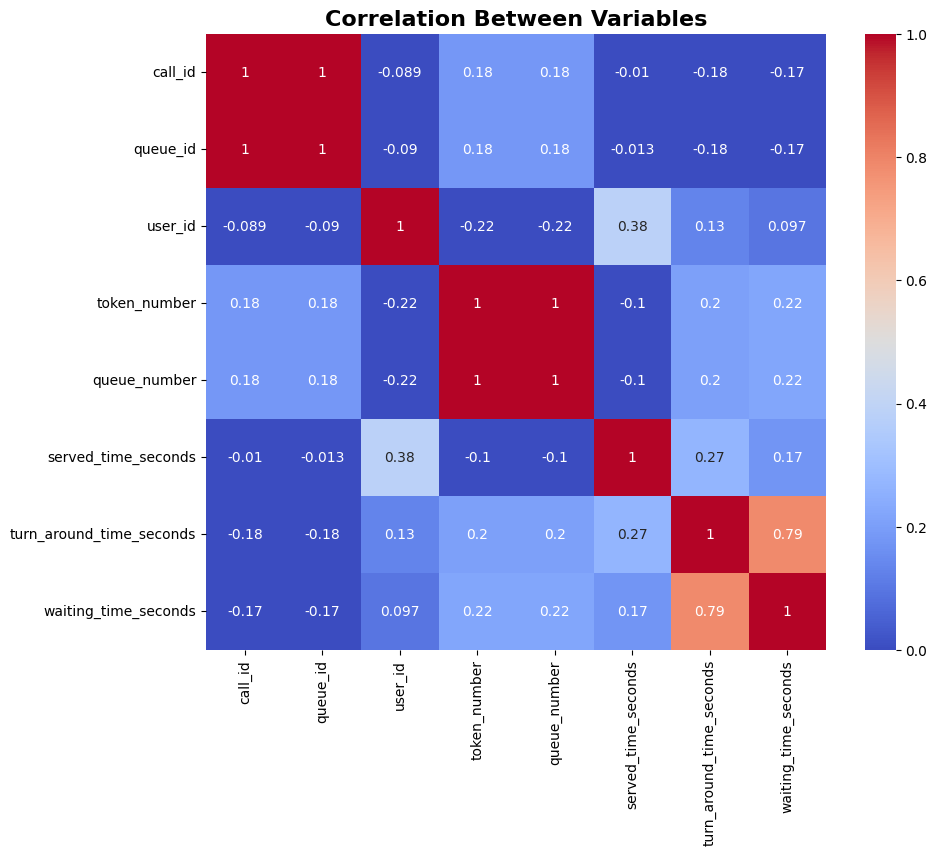

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Correlation Between Variables", fontsize=16, fontweight='bold')
plt.show()